In [1]:
using ControlSystems;
using DifferentialEquations;
using PyPlot;
using Polynomials;

In [109]:
A=[-2 1 0;0 -2 0;0 0 4];
B=[0.0;1;1];
C=[1.0 0 0;0 0 1];
D=0.0;
sys=ss(A,B,C,D,0);

In [96]:
v1=nullspace([-2*eye(3)-sys.A sys.B]);
v2=nullspace([-3*eye(3)-sys.A sys.B]);
v3=nullspace([-4*eye(3)-sys.A sys.B]);

In [97]:
K=[v1[4,1] v2[4,1] v3[4,1]]*inv([v1[1:3,1] v2[1:3,1] v3[1:3,1]])

1×3 Array{Float64,2}:
 0.0  -0.333333  9.33333

In [104]:
u(x,t)=-K*x;
x0=[0.1;0.1;0.1];
tspan=0:0.01:10;
y, t, x, uout = lsim(sys,u,tspan,x0=x0);

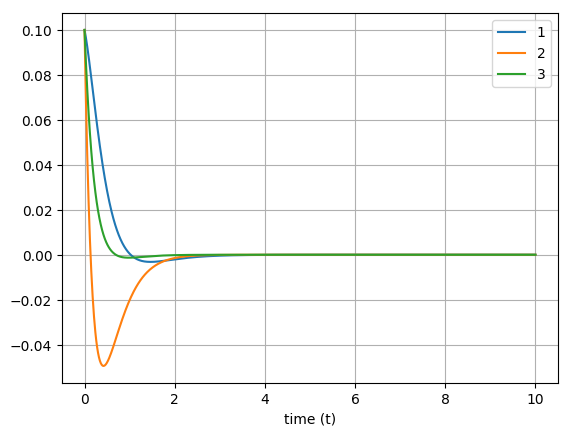

In [105]:
plot(t,x[:,1],label="1")
plot(t,x[:,2],label="2")
plot(t,x[:,3],label="3")
xlabel("time (t)")
legend()
grid(true)

In [100]:
lambda=-16
L=[0 0;lambda+2 0;0 0]

3×2 Array{Int64,2}:
   0  0
 -14  0
   0  0

In [110]:
mutable struct Param
    A::Array{Float64,2}
    B::Array{Float64,1}
    C::Array{Float64,2}
    D::Float64
    K::Array{Float64,2}
    L::Array{Float64,2}
end

In [111]:
function f!(dx,x,param,t)
    A=param.A;
    B=param.B;
    K=param.K;
    L=param.L;
    
    xtrue=x[1:3];
    xhat=x[4:6];
    x[4]=x[1];
    x[6]=x[3];
    u=-K*xhat;
    
    # observer    
    temp_hat=A*xhat+B*u[1]+L*C*(xhat-xtrue);
    
    dx[4]=temp_hat[1];
    dx[5]=temp_hat[2];
    dx[6]=temp_hat[3];
    
    # true physical system
    temp_true=A*xtrue+B*u[1];  

    dx[1]=temp_true[1];
    dx[2]=temp_true[2];
    dx[3]=temp_true[3];
    

end;

In [112]:
param.C=C;
param.K=K;
param.L=L;
param= Param(A,B,C,D,K,L);

In [113]:
x0=[0.1,0.0,0.0,0.5,0.5,0.5];
prob=ODEProblem(f!,x0,(0.0,10.0),param);
sol=solve(prob,Tsit5(),dtmax=0.01);

In [114]:
n=length(sol.t);
x1=zeros(n); [x1[i]=sol.u[i][1] for i=1:n];
x2=zeros(n); [x2[i]=sol.u[i][2] for i=1:n];
x3=zeros(n); [x3[i]=sol.u[i][3] for i=1:n];
x1_hat=zeros(n); [x1_hat[i]=sol.u[i][4] for i=1:n];
x2_hat=zeros(n); [x2_hat[i]=sol.u[i][5] for i=1:n];
x3_hat=zeros(n); [x3_hat[i]=sol.u[i][6] for i=1:n];

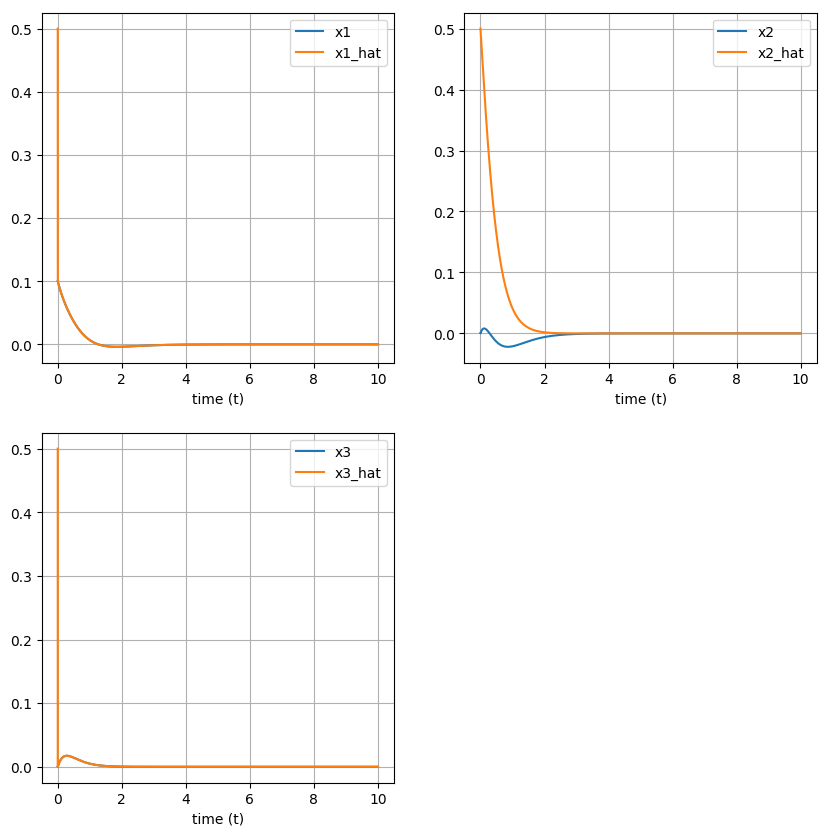

In [115]:
figure(figsize=(10,10))
subplot(221)
plot(sol.t,x1,label="x1")
plot(sol.t,x1_hat,label="x1_hat")
xlabel("time (t)")
legend()
grid(true)
subplot(222)
plot(sol.t,x2,label="x2")
plot(sol.t,x2_hat,label="x2_hat")
xlabel("time (t)")
legend()
grid(true)
subplot(223)
plot(sol.t,x3,label="x3")
plot(sol.t,x3_hat,label="x3_hat")
xlabel("time (t)")
legend()
grid(true)